**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Customer_Data.csv')

## **Data Cleaning and Exploration**

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Removing English Letter from CUST_ID using regular expression

df['CUST_ID'] = df['CUST_ID'].str.replace(r'\D', '', regex = True)

# Change Data Type from object to int
df['CUST_ID'] = df['CUST_ID'].astype('int64')

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# Checking the Data Types of All Columns

df.dtypes

CUST_ID                               int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
# Change all the Data Types to float
for col in df.columns:
  if df[col].dtypes == 'int64':
    df[col] = df[col].astype('float64')

In [8]:
# Information of the whole dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   float64
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   float64
 12  PURCHA

Checking the total missing values of each columns

In [9]:
missing_values = []
for col in df.columns:
  missing_values.append(df[col].isna().sum())

In [10]:
Col = df.columns

In [11]:
Col = pd.DataFrame(Col)
missing_values= pd.DataFrame(missing_values)

In [12]:
result_missing = pd.concat([Col, missing_values], axis = 1)
result_missing.columns = ['Columns', 'Missing_values']

In [13]:
result_missing

,Columns,Missing_values
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


**Filling Missing Values**

In [14]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df[['MINIMUM_PAYMENTS']] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

### **Outlier Detection using Boxplot**

<Axes: >

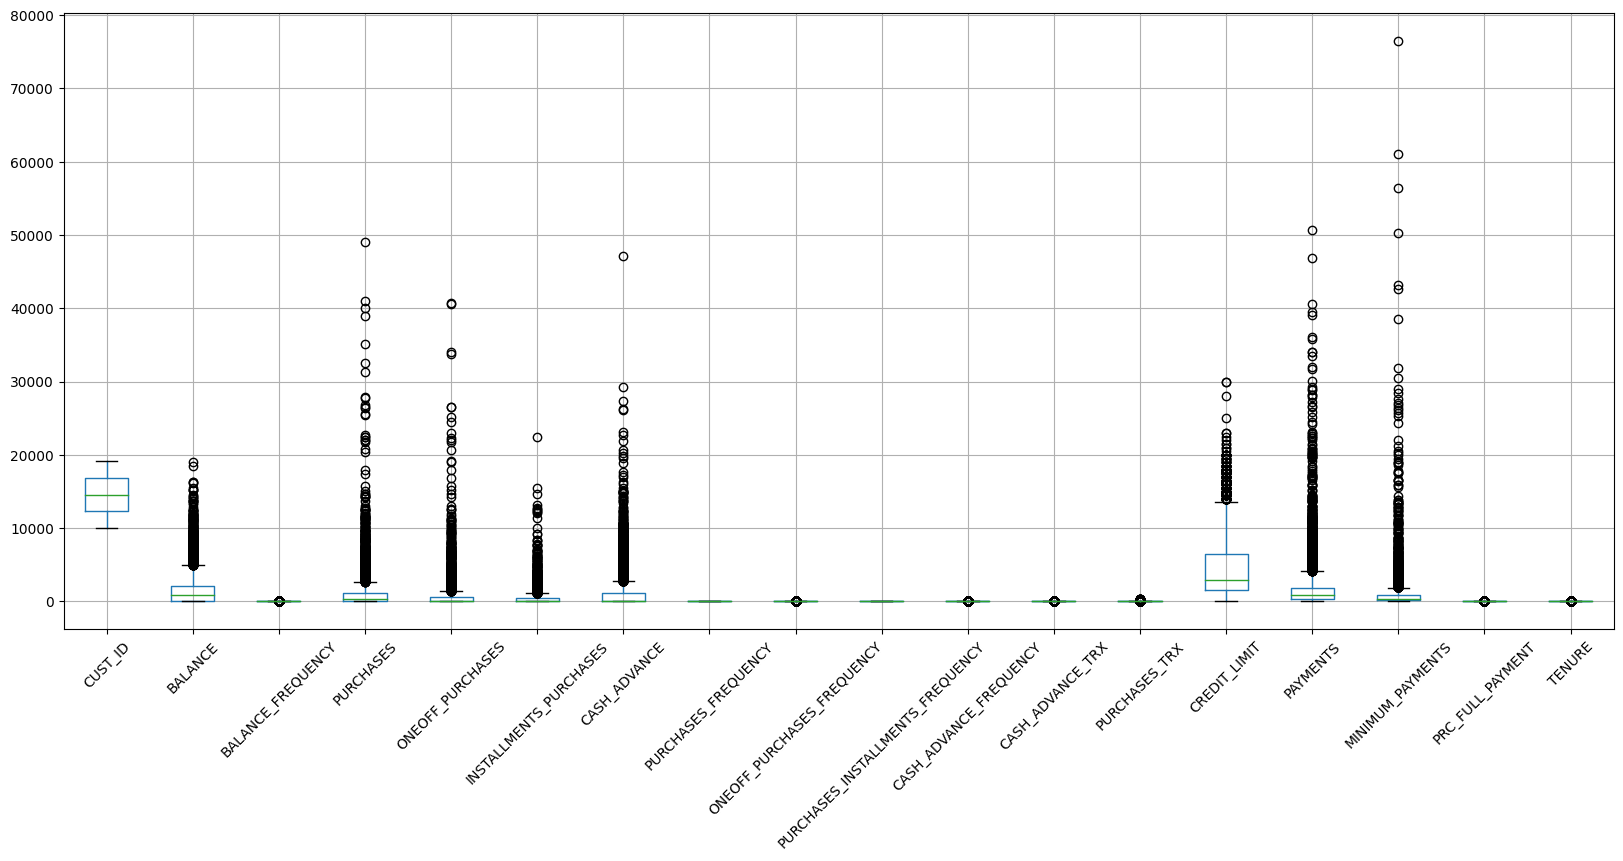

In [16]:
plt.figure(figsize = (20, 8))
df.boxplot(rot = 45)

**Check the total outliers of each columns**

In [17]:
total_outliers = []

for col in df.columns[1:]:
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_bound = percentile75 + 1.5 * iqr
  lower_bound = percentile25 - 1.5 * iqr
  total_outliers.append(sum((df[col] < lower_bound) | (df[col] > upper_bound)))


In [18]:
total_outliers = pd.DataFrame(total_outliers)

In [19]:
result_outlier = pd.concat([Col, total_outliers], axis = 1)
result_outlier.columns = ['Columns', 'Sum of Outliers']

In [20]:
result_outlier

,Columns,Sum of Outliers
0,CUST_ID,695.0
1,BALANCE,1493.0
2,BALANCE_FREQUENCY,808.0
3,PURCHASES,1013.0
4,ONEOFF_PURCHASES,867.0
5,INSTALLMENTS_PURCHASES,1030.0
6,CASH_ADVANCE,0.0
7,PURCHASES_FREQUENCY,782.0
8,ONEOFF_PURCHASES_FREQUENCY,0.0
9,PURCHASES_INSTALLMENTS_FREQUENCY,525.0


### **Checking the Distribution of Data**

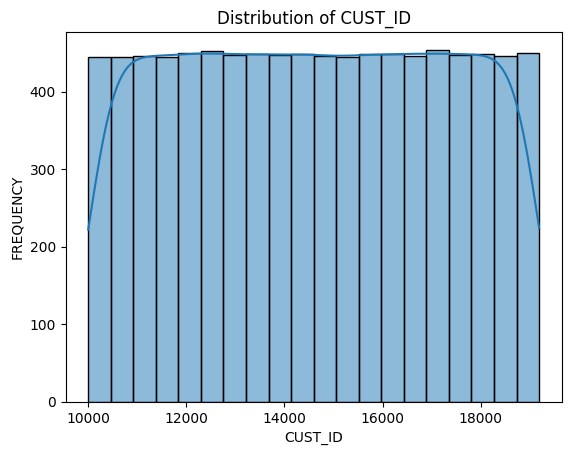

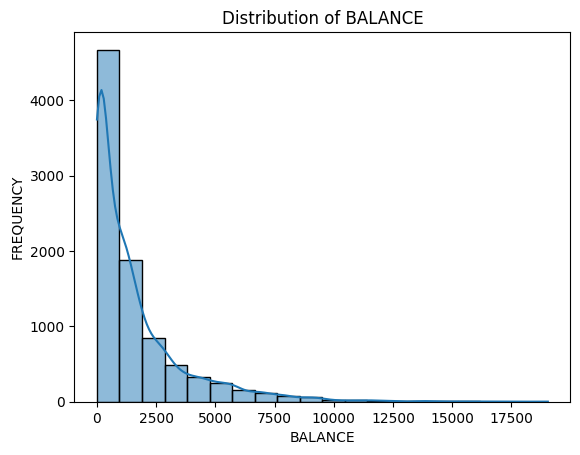

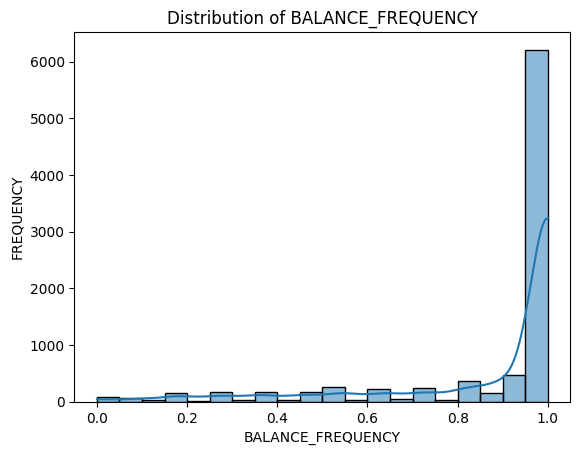

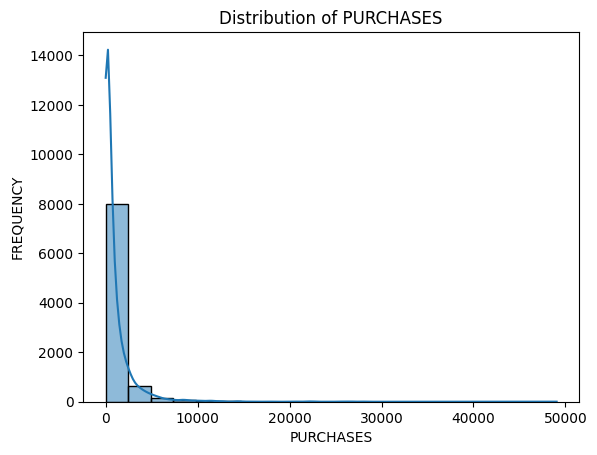

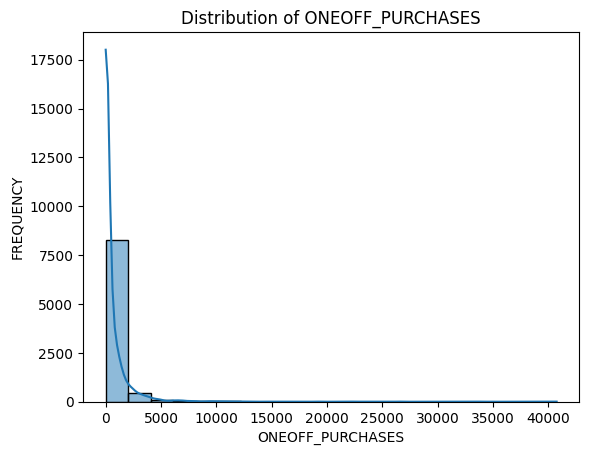

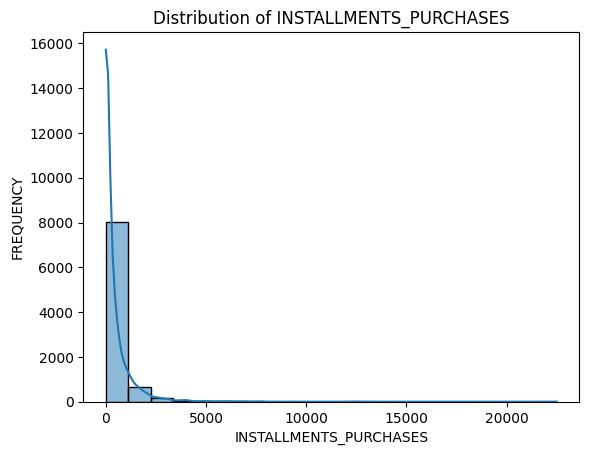

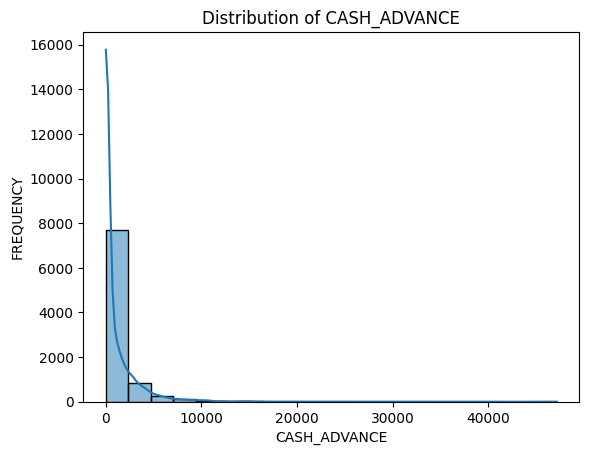

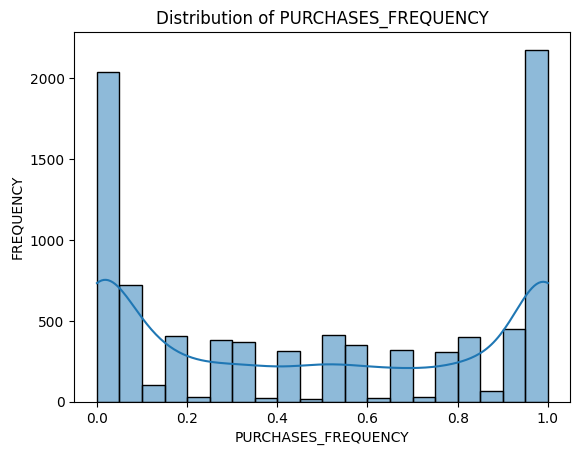

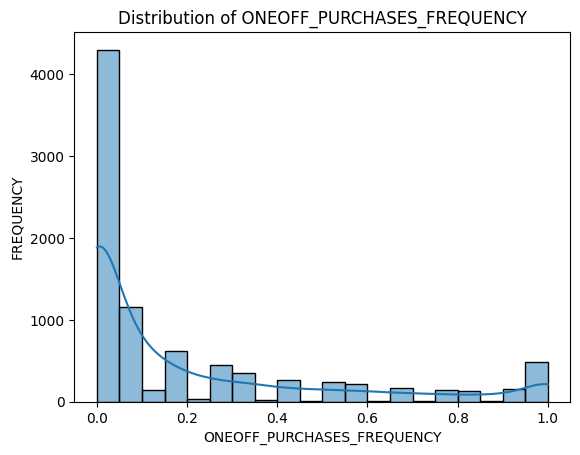

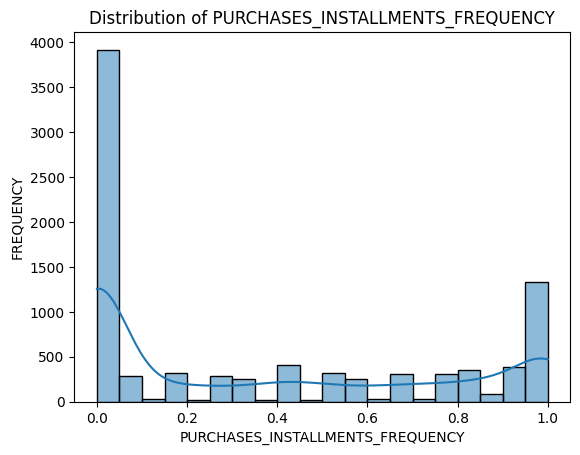

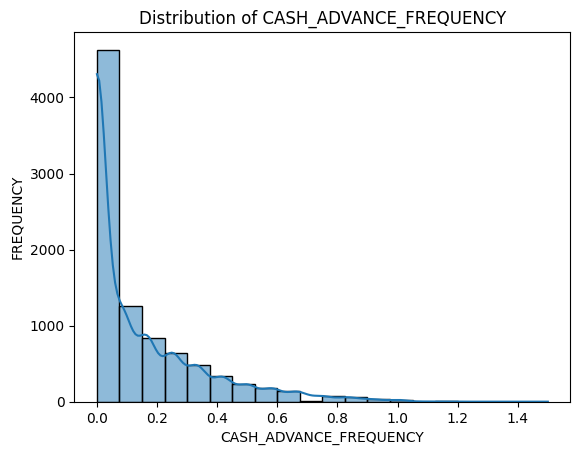

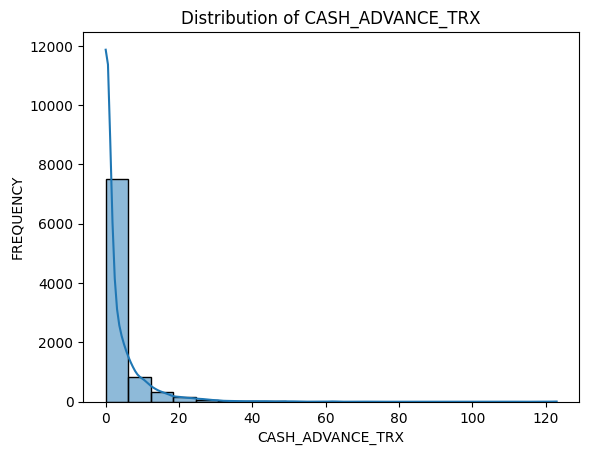

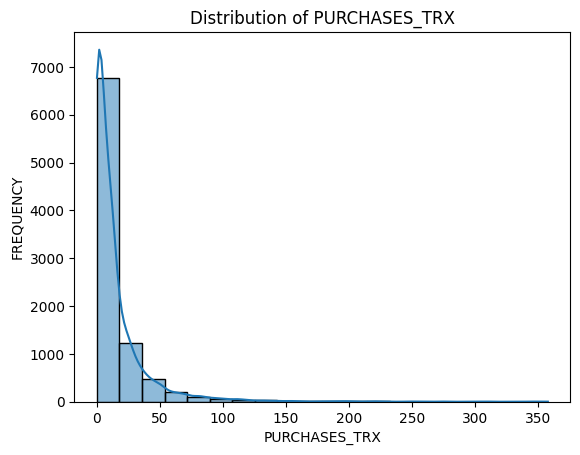

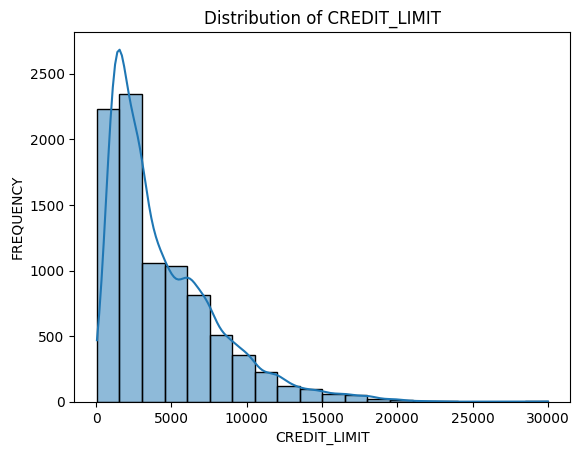

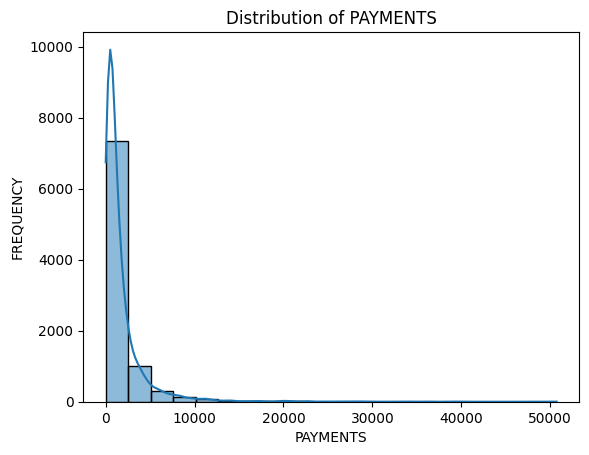

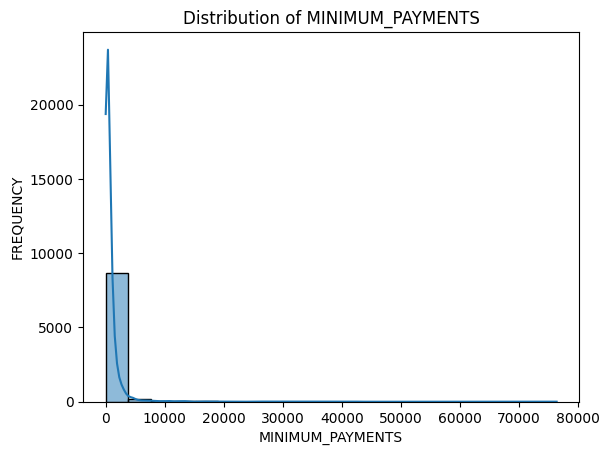

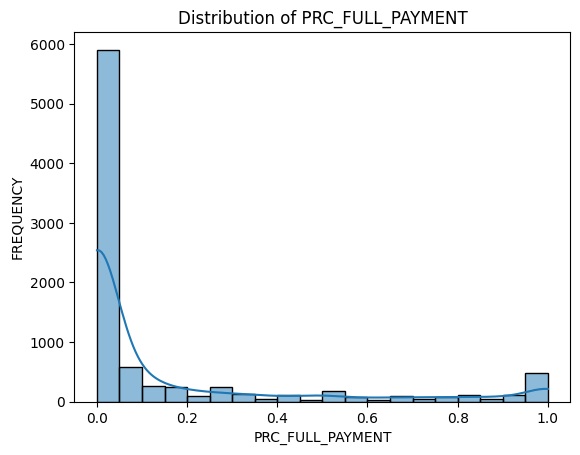

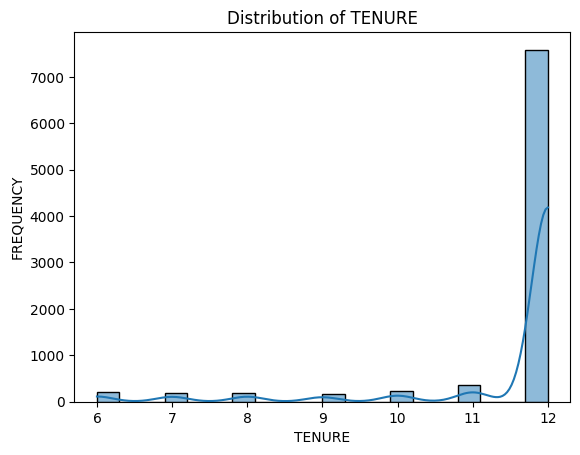

In [ ]:
for col in df.columns:
  sns.histplot(df[col], kde = True, bins = 20)
  plt.title('Distribution of {}'.format(col))
  plt.xlabel(col)
  plt.ylabel('FREQUENCY')
  plt.show()

## **Statistical Analysis**

In [21]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,14600.040670,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2651.305875,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,12307.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,14598.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,16899.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19190.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [22]:
# Data Splitting

X = df.iloc[:,:]

In [23]:
# Checking the number of Rows and Columns
X.shape

(8950, 18)

# **Algorithm Selection**

### **K-Means with Elbow Method**

In [24]:
distances = []
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  distances.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Plot distance with their respective number of clusters**

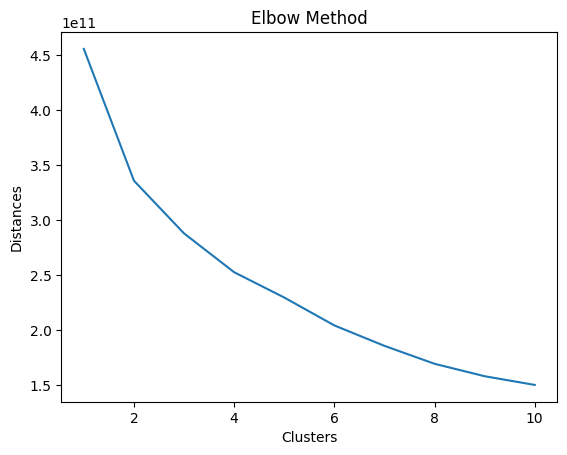

In [25]:
plt.plot(range(1,11), distances)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distances')
plt.show()

## **Silhouette Score**

In [33]:
distances = []
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++')
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  distances.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [34]:
# Find suitable number of clusters with high silhouette score
distances

[0.42593449979764775,
 0.3758402535764535,
 0.25130717076663545,
 0.2590742535484474,
 0.2678799817209666,
 0.2713220741254244,
 0.2775015035460162,
 0.2824372102444667,
 0.28558068256430075]

**Plotting # of Clusters with their Silhouette Score**

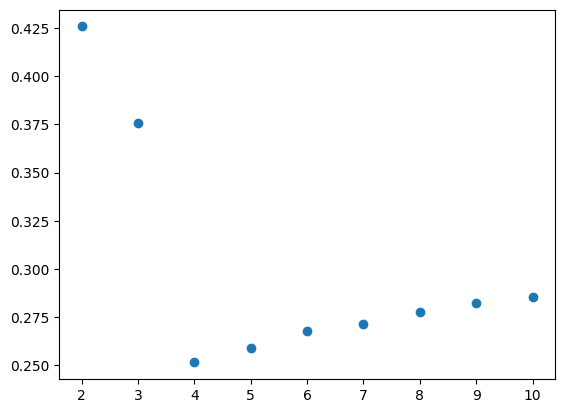

In [35]:
plt.scatter(range(2,11), distances)

### **Model Implementation with KMeans Clustering**

In [26]:
k_cluster = KMeans(n_clusters=2, init = 'k-means++', random_state = 42)
elbow_pred = k_cluster.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **KMeans Clustering using Iterative Method**

In [37]:
# Converting DataFrame to Numpy array

X = np.array(X)
X.shape

(8950, 18)

**Find Closest Centroid**

In [29]:
def find_close_centroid(X, initial_centroids):
  idx = np.zeros(X.shape[0], 'float64')
  lst = []
  for i in range(X.shape[0]):
    lst = np.sum((X[i] - initial_centroids) ** 2, axis = 1)
    idx[i] = np.argmin(lst)

  return idx

**Compute Centroid to get Mean**

In [30]:
def compute_centroid(X, idx, K):
  m,n = X.shape
  centroids = np.zeros((K,n))
  for i in range(K):
    centroids[i] = np.mean(X[idx == i], axis = 0)

  return centroids

**Find the best Centroid using iteration**

In [31]:
def Run_KMean(X, initial_centroids,max_iteration = 10):
  idx = np.zeros(X.shape[0])
  centroids = initial_centroids.copy()
  K = initial_centroids.shape[0]
  for i in range(max_iteration):

    idx = find_close_centroid(X, initial_centroids)
    centroids = compute_centroid(X, idx, K)
  return idx, centroids


**Parameter Initialization**

In [36]:
k = 2
rand_data = np.random.permutation(X.shape[0])
initial_centroids = X[rand_data[:k]]
max_iter = 10
idx, centroids = Run_KMean(X, initial_centroids, max_iter)
idx
centroids

array([[1.46622152e+04, 6.95757523e+02, 8.46045865e-01, 6.60864763e+02,
        3.50396867e+02, 3.10773477e+02, 3.20648284e+02, 4.94836389e-01,
        1.75282869e-01, 3.69355034e-01, 8.23233760e-02, 1.60431428e+00,
        1.14906314e+01, 3.21609479e+03, 9.46435686e+02, 4.22468591e+02,
        1.80652394e-01, 1.14885845e+01],
       [1.44481089e+04, 3.68730038e+03, 9.53572800e-01, 1.83975804e+03,
        1.18389533e+03, 6.56149700e+02, 2.58732559e+03, 4.79388805e-01,
        2.68862935e-01, 3.52420310e-01, 2.64218866e-01, 7.26741054e+00,
        2.25763755e+01, 7.61827801e+03, 3.65556923e+03, 1.94365161e+03,
        8.78887076e-02, 1.15875337e+01]])

# **Hierarchical Clustering**

## **Plot Dendrogram**

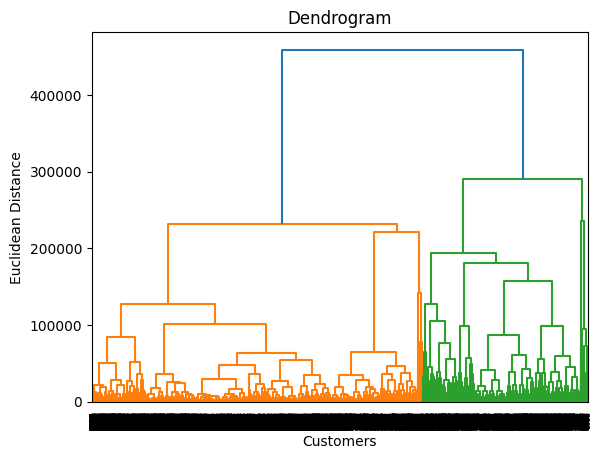

In [ ]:
# Plotting Dendrogram for appropriate number of clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## **Model Implementation with Hierarchical Clustering**

In [38]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### **Compute the Differences of each Model**

In [39]:
elbow_new = pd.DataFrame(elbow_pred)
hc_new = pd.DataFrame(hc_pred)
idx_new = pd.DataFrame(idx)

In [40]:
table = pd.concat([elbow_new, idx_new, hc_new], axis = 1)

In [41]:
table.columns = ['Elbow Cluster', 'IDX Cluster', 'Hierarchy Cluster',]

In [42]:
table

,Elbow Cluster,IDX Cluster,Hierarchy Cluster
0,0,0.0,1
1,1,1.0,0
2,1,0.0,0
3,1,0.0,0
4,0,0.0,1
...,...,...,...
8945,0,0.0,1
8946,0,0.0,1
8947,0,0.0,1
8948,0,0.0,1
